In [2]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import networkx as nx
from scipy.stats import zscore
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

In [3]:
# import datasets
import pandas as pd
import os

# data directory
data_dir = os.getcwd()+"\\data\\"

# import dataframes seperately
df_customer = pd.read_csv(data_dir+"olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_dir+"olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_dir+"olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_dir+"olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_dir+"olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_dir+"olist_orders_dataset.csv")
df_products = pd.read_csv(data_dir+"olist_products_dataset.csv")
df_sellers = pd.read_csv(data_dir+"olist_sellers_dataset.csv")
df_product_category_name = pd.read_csv(data_dir+"product_category_name_translation.csv")

# combine all datasets
df_all = df_customer.merge(df_orders, on='customer_id', how='left').merge(df_reviews, on='order_id', how='left').merge(df_payments, on='order_id', how='left').merge(df_order_items, on='order_id', how='left').merge(df_sellers, on='seller_id', how='left').merge(df_products, on='product_id', how='left').merge(df_product_category_name, on='product_category_name', how='left')

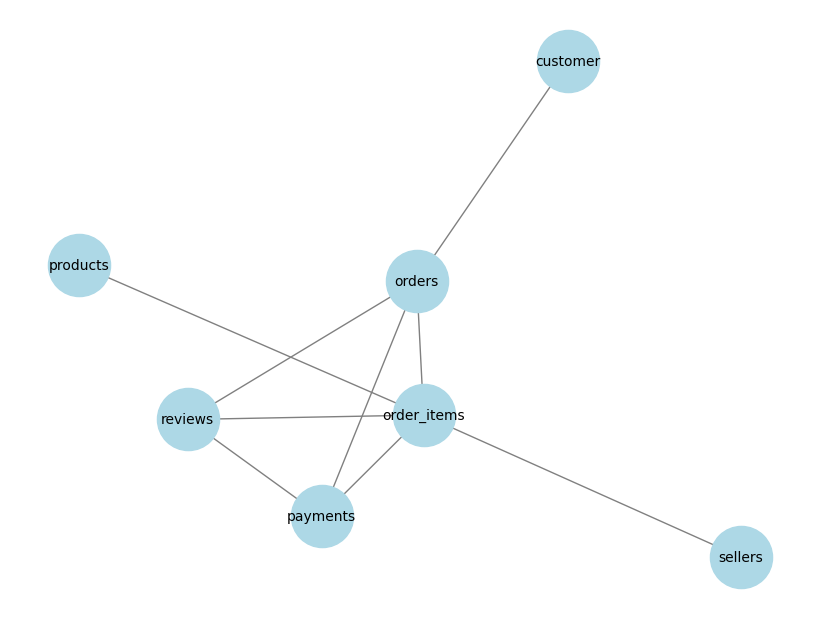

In [26]:
# graph of dataset connections


# Sample data: each list represents an array
arrays = [
    df_customer.columns,
    df_order_items.columns,
    df_payments.columns,
    df_reviews.columns,
    df_orders.columns,
    df_products.columns,
    df_sellers.columns,
]

# Step 1: Create a mapping of arrays to index labels (for easier visualization)
array_names = ['customer',
    'order_items',
    'payments',
    'reviews',
    'orders',
    'products',
    'sellers',]
array_labels = {i: array_names[i] for i in range(len(arrays))}  # Map index to label

# Step 2: Create a graph where nodes are arrays
G = nx.Graph()
G.add_nodes_from(array_labels.keys())  # Nodes are array indices

# Step 3: Find shared elements and create edges
for i in range(len(arrays)):
    for j in range(i + 1, len(arrays)):
        if set(arrays[i]) & set(arrays[j]):  # Check for common elements
            G.add_edge(i, j)  # Connect arrays that share elements

# Step 4: Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, labels=array_labels, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)

plt.show()


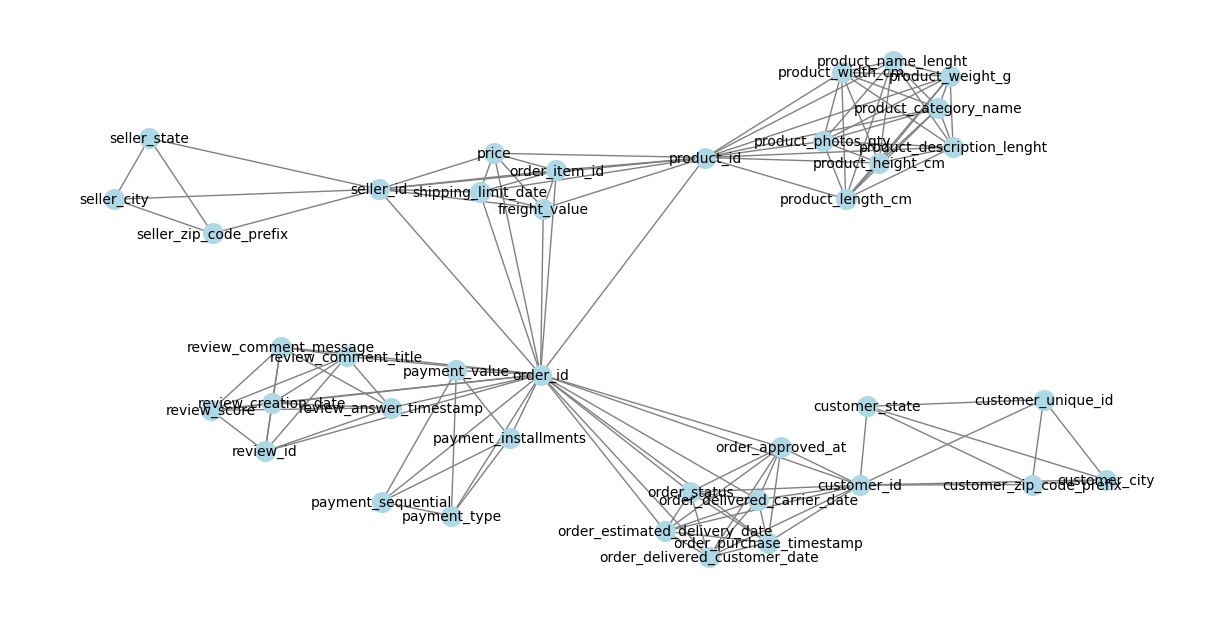

In [32]:
# graph of dataset connections on column level

# Sample data: lists of connected strings
arrays = [
    df_customer.columns,
    # df_geolocation.columns,
    df_order_items.columns,
    df_payments.columns,
    df_reviews.columns,
    df_orders.columns,
    df_products.columns,
    df_sellers.columns,
    # df_product_category_name.columns
]

# Create a graph
G = nx.Graph()

# Add edges between elements that appear in the same array
for arr in arrays:
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            G.add_edge(arr[i], arr[j])  # Connect elements

# Draw the graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G, k = 0.7, seed = 4)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=200, font_size=10)

# Show plot
plt.show()

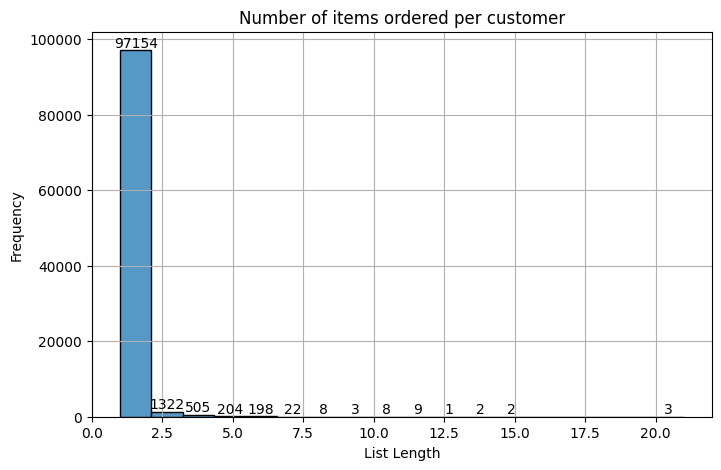

In [3]:
# product recommendation
df_test = df_orders[['customer_id', 'order_id']].merge(df_order_items[['order_id', 'product_id']], on='order_id', how='left').groupby('customer_id')['product_id'].agg(list).reset_index()
list_lengths = [len(lst) for lst in df_test['product_id']]

# plotting
plt.figure(figsize=(8, 5))
ax = sns.histplot(list_lengths, kde=False)

# Labels and title
plt.xlabel("List Length")
plt.ylabel("Frequency")
plt.title("Number of items ordered per customer")
# plt.xticks(range(max(list_lengths) + 1))  # Set x-axis to integer values
plt.grid(True)

for patch in ax.patches:
    height = patch.get_height()  # Get the height of the bin (frequency)
    if height > 0:  # Only label bins with observations
        ax.text(patch.get_x() + patch.get_width()/2, height, 
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
# Show plot
plt.show()

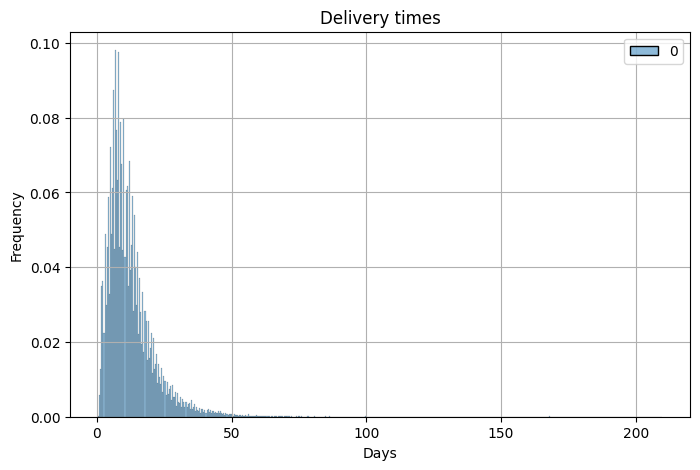

In [5]:
# delivery time

df_shipping_time = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))

# Filter out rows where any column has a Z-score > 3
# z_scores = np.abs(df_shipping_time.apply(zscore))
# df_filtered = df_shipping_time[(z_scores < 6).all(axis=1)]
# print(df_filtered)

# plotting
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_shipping_time, stat = 'density')

# Labels and title
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Delivery times")
# plt.xticks(range(max(df_filtered) + 1))  # Set x-axis to integer values
plt.grid(True)

# for patch in ax.patches:
#     height = patch.get_height()  # Get the height of the bin (frequency)
#     if height > 0:  # Only label bins with observations
#         ax.text(patch.get_x() + patch.get_width()/2, height, 
#                 f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
plt.show()

            seller_city          customer_city  shipping_time
0       itaquaquecetuba                 franca       8.436574
1                itajai  sao bernardo do campo      13.782037
2       itaquaquecetuba              sao paulo       9.394213
3       itaquaquecetuba        mogi das cruzes      13.208750
4              ibitinga               campinas       2.873877
...                 ...                    ...            ...
112645            garca              sao paulo       8.218009
112646       araraquara        taboao da serra      22.193727
112647        sao paulo              fortaleza      24.859421
112648          guariba                 canoas      17.086424
112649        sao paulo                  cotia       7.674306

[112650 rows x 3 columns]


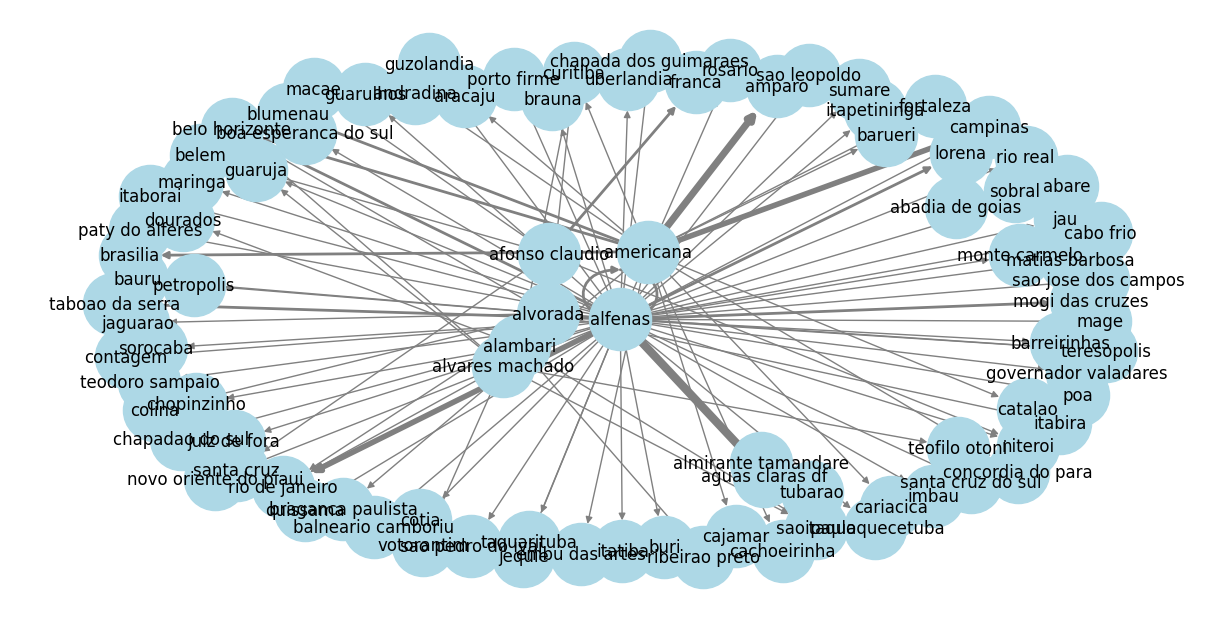

In [47]:
# delivery distance
df_test = df_customer[['customer_city', 'customer_id']].merge(df_orders[['order_id', 'customer_id']], on='customer_id')
df_test["shipping_time"] = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_test = df_test.merge(df_order_items[['order_id', 'seller_id']], on='order_id').merge(df_sellers[['seller_id', 'seller_city']], on='seller_id')[[ 'seller_city', 'customer_city', 'shipping_time']]
print(df_test)
df_weighted = df_test.groupby(["seller_city", "customer_city"]).size().reset_index(name="weight")
# print(df_weighted[:20])

# Create weighted graph
G = nx.from_pandas_edgelist(df_weighted[1:99], source="seller_city", target="customer_city", edge_attr="weight", create_using = nx.DiGraph())
weights = [d["weight"] for _, _, d in G.edges(data=True)]
pos = nx.spring_layout(G, k = 0.2, seed=42)

plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", 
        node_size=2000, font_size=12, arrows=True, width=weights) 
# edge labelling
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
plt.show()

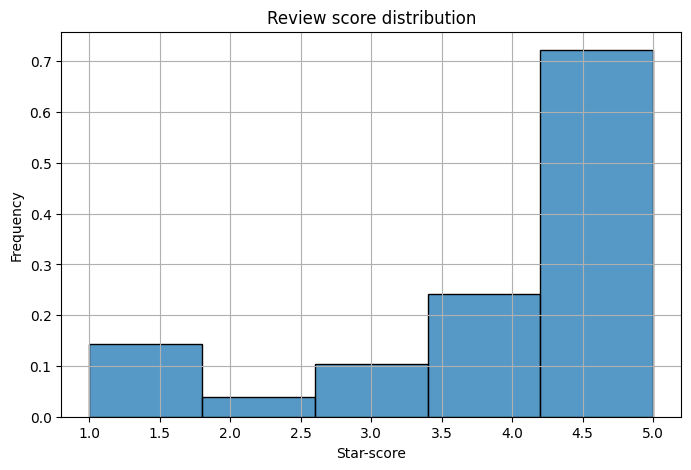

In [24]:
# review score
df_review_score = df_reviews["review_score"]

plt.figure(figsize=(8, 5))
ax = sns.histplot(df_review_score, stat = 'density', bins = 5)

# Labels and title
plt.xlabel("Star-score")
plt.ylabel("Frequency")
plt.title("Review score distribution")
# plt.xticks(range(max(df_filtered) + 1))  # Set x-axis to integer values
plt.grid(True)

# for patch in ax.patches:
#     height = patch.get_height()  # Get the height of the bin (frequency)
#     if height > 0:  # Only label bins with observations
#         ax.text(patch.get_x() + patch.get_width()/2, height, 
#                 f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
plt.show()

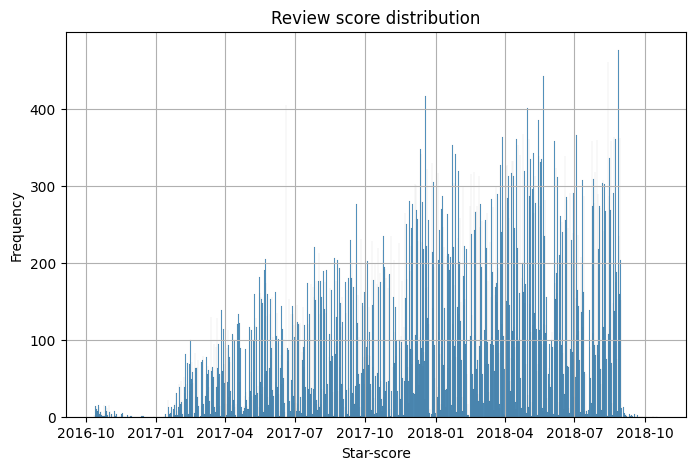

In [42]:
# orders over time
df_plot = pd.to_datetime(df_orders["order_delivered_customer_date"])

plt.figure(figsize=(8, 5))
ax = sns.histplot(df_plot, bins = 1095)

# Labels and title
plt.xlabel("Star-score")
plt.ylabel("Frequency")
plt.title("Review score distribution")
# plt.xticks(range(max(df_filtered) + 1))  # Set x-axis to integer values
plt.grid(True)

# for patch in ax.patches:
#     height = patch.get_height()  # Get the height of the bin (frequency)
#     if height > 0:  # Only label bins with observations
#         ax.text(patch.get_x() + patch.get_width()/2, height, 
#                 f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
plt.show()

In [48]:
# random_forest prepare data 

# prepare dataset
df_random_forest = df_reviews[["review_score", "order_id"]].merge(df_orders[["order_id", "order_delivered_customer_date","order_purchase_timestamp"]], on='order_id', how='left')
df_random_forest = df_random_forest.merge(df_order_items[["order_id", "freight_value"]], on='order_id', how='left')
df_random_forest = df_random_forest.dropna()
df_random_forest["shipping_time"] = pd.DataFrame((pd.to_datetime(df_random_forest["order_delivered_customer_date"]) -pd.to_datetime(df_random_forest["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))

# select input and output data
X = df_random_forest[["shipping_time", "freight_value"]]
y = df_random_forest["review_score"]

# split test and train data
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy().reshape(-1,1), test_size=0.33, random_state=42)

In [ ]:
# random_forest train, test, and validate data 

# determine and train model
model = RandomForestClassifier(n_estimators = 20, random_state=0)
model.fit(X_train, y_train)

# validate model
y_predicted = model.predict(X_test)
report = classification_report(y_test, y_predicted)
print("Classification Report:\n", report)

c:\Users\kajve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[5 5 5 ... 5 5 5]
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.44      0.47      4173
           2       0.35      0.23      0.27      1187
           3       0.30      0.20      0.24      3019
           4       0.33      0.25      0.29      7023
           5       0.66      0.78      0.72     20902

    accuracy                           0.57     36304
   macro avg       0.43      0.38      0.40     36304
weighted avg       0.54      0.57      0.55     36304



In [55]:
# pre-process data
import pandas as pd
# print(df_data.iloc[0])

# make copy of df_all
df_data = df_all.copy()

# replace all timestamps with shipping times
df_shipping_time = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_data["shipping_time"] = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_data.drop(["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1, inplace=True)

# drop string columns
# df_data.drop(["review_comment_message"], axis=1, inplace=True)
# df_data.drop(["seller_id", "customer_id", "order_id", "customer_unique_id", "review_id", "product_id"], axis=1, inplace=True)
numeric_cols = df_data.select_dtypes(include=['number']).columns
df_data = df_data[numeric_cols]

# drop nan columns
df_data.dropna(inplace=True)

# save as .csv file
df_data.to_csv('data/merged_data.csv', index=False)


In [56]:
# neural_network prepare data
X = df_data.drop(["review_score"], axis = 1)
y = df_data["review_score"]

# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().reshape(-1,1), test_size=0.2, random_state=0)

In [ ]:
# neural network classifier methods

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, dropout=0.5):
        super(NeuralNetworkClassifier, self).__init__()
        layers = []
        prev_size = input_size
        
        for hidden in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_size = hidden
               
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Example usage
def train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

def evaluate_model(model, test_loader, device='cpu'):
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [58]:
# built specfic model for customer satisfaction
train_dataset = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train.squeeze() - 1).long())
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test.squeeze() - 1).long())
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Creating a model
input_size = len(X_train[0])  # Example feature size
hidden_layers = [64, 32]
output_size = 5  # Example number of classes

model = NeuralNetworkClassifier(input_size, hidden_layers, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
# run functions with specific customer satisfaction model

train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu')
evaluate_model(model, test_loader, device='cpu')

Epoch 1/10, Loss: 1.2583
Epoch 2/10, Loss: 1.2294
Epoch 3/10, Loss: 1.2236
Epoch 4/10, Loss: 1.2199
Epoch 5/10, Loss: 1.2178
Epoch 6/10, Loss: 1.2166
Epoch 7/10, Loss: 1.2157
Epoch 8/10, Loss: 1.2150
Epoch 9/10, Loss: 1.2144
Epoch 10/10, Loss: 1.2140
Test Accuracy: 56.57%


In [76]:
def permutation_importance(model, test_loader, loss_fn, device='cpu'):

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

    baseline_preds = model(torch.tensor(inputs).to(device)).detach().cpu().numpy()
    baseline_loss = loss_fn(baseline_preds, torch.tensor(labels)).item()
    
    importances = []
    for i in range(inputs.shape[1]):  # Iterate through each feature
        X_test_shuffled = inputs.clone()
        np.random.shuffle(X_test_shuffled[:, i])  # Shuffle one feature

        shuffled_preds = model(torch.tensor(X_test_shuffled).to(device)).detach().cpu().numpy()
        shuffled_loss = loss_fn(shuffled_preds, torch.tensor(labels)).item()
        
        importances.append(shuffled_loss - baseline_loss)  # Larger difference = more important

    return np.array(importances)

# Example usage
loss_fn = torch.nn.MSELoss()  # Example: Mean Squared Error for regression
# loss_fn = nn.CrossEntropyLoss()
importances = permutation_importance(model, test_loader, loss_fn)
print(importances)

C:\Users\kajve\AppData\Local\Temp\ipykernel_28496\1975153944.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  baseline_preds = model(torch.tensor(inputs).to(device)).detach().cpu().numpy()
C:\Users\kajve\AppData\Local\Temp\ipykernel_28496\1975153944.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  baseline_loss = loss_fn(baseline_preds, torch.tensor(labels)).item()


TypeError: 'int' object is not callable

In [126]:
from datetime import datetime

df_data = df_all.copy()

# edit the time variables
df_shipping_time = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_data["shipping_time"] = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_data["order_purchase_timestamp"] = pd.to_datetime(df_data["order_purchase_timestamp"]).dt.day_name()
df_data["order_delivered_customer_date"] = pd.to_datetime(df_data["order_delivered_customer_date"]).dt.day_name()
df_data.drop(["review_creation_date", "review_answer_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"], axis=1, inplace=True)

# drop all ids
df_data.drop(["seller_id", "customer_id", "order_item_id", "order_id", "customer_unique_id", "review_id", "product_id"], axis=1, inplace=True)

# drop useless information
df_data.drop(["order_status", "product_category_name", "review_comment_title", "review_comment_message"], axis=1, inplace=True)

print(df_data.iloc[0])

customer_zip_code_prefix                       14409
customer_city                                 franca
customer_state                                    SP
order_purchase_timestamp                     Tuesday
order_delivered_customer_date               Thursday
review_score                                     4.0
payment_sequential                               1.0
payment_type                             credit_card
payment_installments                             2.0
payment_value                                 146.87
shipping_limit_date              2017-05-22 15:22:12
price                                         124.99
freight_value                                  21.88
seller_zip_code_prefix                        8577.0
seller_city                          itaquaquecetuba
seller_state                                      SP
product_name_lenght                             41.0
product_description_lenght                    1141.0
product_photos_qty                            

In [6]:
# import and create new datasets
import pandas as pd
import os

# data directory
data_dir = os.getcwd()+"\\data\\"

# import dataframes seperately
df_customer = pd.read_csv(data_dir+"olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_dir+"olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_dir+"olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_dir+"olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_dir+"olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_dir+"olist_orders_dataset.csv")
df_products = pd.read_csv(data_dir+"olist_products_dataset.csv")
df_sellers = pd.read_csv(data_dir+"olist_sellers_dataset.csv")
df_product_category_name = pd.read_csv(data_dir+"product_category_name_translation.csv")

# combine all datasets and save to .csv file
df_all = df_customer.merge(df_orders, on='customer_id', how='left').merge(df_reviews, on='order_id', how='left').merge(df_payments, on='order_id', how='left').merge(df_order_items, on='order_id', how='left').merge(df_sellers, on='seller_id', how='left').merge(df_products, on='product_id', how='left').merge(df_product_category_name, on='product_category_name', how='left')
df_shipping_time = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_all["shipping_time"] = pd.DataFrame((pd.to_datetime(df_orders["order_delivered_customer_date"]) -pd.to_datetime(df_orders["order_purchase_timestamp"])).dt.total_seconds()/(24*3600))
df_all.to_csv('data/merged_data.csv', index=False)

# create weekly dataset

In [ ]:
# Aggregate sales per week
import pandas as pd
import datetime

# select relevant columns only
df_data = df_all[["order_purchase_timestamp", "review_score", "price", "freight_value", "shipping_time", "product_category_name_english"]]
df_data.dropna(inplace=True)
df_data["week"] = pd.to_datetime(df_data['order_purchase_timestamp']).dt.to_period("W")

# per week and per item type dataframes
item = df_data.groupby(['week', 'product_category_name_english']).size().unstack(fill_value=0)
total_items = df_data.groupby('week').size()
item = item.div(total_items, axis=0)
# print(item.columns) # maybe think about merging some categories further?

price = df_data.groupby(['week', 'product_category_name_english'])['price'].sum().unstack(fill_value=0)
total_price = df_data.groupby('week')['price'].sum()
price = price.div(total_price, axis=0)

freight_value = df_data.groupby(['week', 'product_category_name_english'])['freight_value'].sum().unstack(fill_value=0)
total_freight_value = df_data.groupby('week')['price'].sum()
freight_value = freight_value.div(total_freight_value, axis=0)
# print(freight_value.iloc[50])

review_score = df_data.groupby(['week', 'product_category_name_english'])['review_score'].mean().unstack(fill_value=0)
# print(review_score.iloc[50])

shipping_time = df_data.groupby(['week', 'product_category_name_english'])['shipping_time'].mean().unstack(fill_value=0)
# print(shipping_time.iloc[50])


# # Convert week to datetime
# sales_per_week["week"] = sales_per_week["week"].dt.start_time

# # Sort by date
# sales_per_week = sales_per_week.sort_values("week")


product_category_name_english
agro_industry_and_commerce    3.000000
air_conditioning              3.333333
art                           0.000000
arts_and_craftmanship         0.000000
audio                         5.000000
                                ...   
stationery                    4.121212
tablets_printing_image        4.000000
telephony                     3.553191
toys                          4.383333
watches_gifts                 4.128571
Name: 2017-11-13/2017-11-19, Length: 71, dtype: float64


C:\Users\kajve\AppData\Local\Temp\ipykernel_49680\3832524929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.dropna(inplace=True)
C:\Users\kajve\AppData\Local\Temp\ipykernel_49680\3832524929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["week"] = pd.to_datetime(df_data['order_purchase_timestamp']).dt.to_period("W")


print std deviation per product_id

inputs.
last week per category product profits

per week per categroy:
- relative price
- relative freight value
- relative amount of items
- average review score
- average delivery time

review score